# 🚀 Google Colab Setup

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ogautier1980/sandbox-ml/blob/main/cours/00_introduction/00_demo_ml_pipeline.ipynb)

**Si vous exécutez ce notebook sur Google Colab**, exécutez la cellule suivante pour installer les dépendances.

In [2]:
# Installation des dépendances (Google Colab uniquement)

import sys

IN_COLAB = 'google.colab' in sys.modules



if IN_COLAB:

    print('📦 Installation des packages...')

    

    # Packages ML de base

    !pip install -q numpy pandas matplotlib seaborn scikit-learn

    

    # Détection du chapitre et installation des dépendances spécifiques

    notebook_name = '00_demo_ml_pipeline.ipynb'  # Sera remplacé automatiquement

    

    # Ch 06-08 : Deep Learning

    if any(x in notebook_name for x in ['06_', '07_', '08_']):

        !pip install -q torch torchvision torchaudio

    

    # Ch 08 : NLP

    if '08_' in notebook_name:

        !pip install -q transformers datasets tokenizers

        if 'rag' in notebook_name:

            !pip install -q sentence-transformers faiss-cpu rank-bm25

    

    # Ch 09 : Reinforcement Learning

    if '09_' in notebook_name:

        !pip install -q gymnasium[classic-control]

    

    # Ch 04 : Boosting

    if '04_' in notebook_name and 'boosting' in notebook_name:

        !pip install -q xgboost lightgbm catboost

    

    # Ch 05 : Clustering avancé

    if '05_' in notebook_name:

        !pip install -q umap-learn

    

    # Ch 11 : Séries temporelles

    if '11_' in notebook_name:

        !pip install -q statsmodels prophet

    

    # Ch 12 : Vision avancée

    if '12_' in notebook_name:

        !pip install -q ultralytics timm segmentation-models-pytorch

    

    # Ch 13 : Recommandation

    if '13_' in notebook_name:

        !pip install -q scikit-surprise implicit

    

    # Ch 14 : MLOps

    if '14_' in notebook_name:

        !pip install -q mlflow fastapi pydantic

    

    print('✅ Installation terminée !')

else:

    print('ℹ️  Environnement local détecté, les packages sont déjà installés.')

ℹ️  Environnement local détecté, les packages sont déjà installés.


# Chapitre 00 - Démonstration : Pipeline ML Complet

**Objectif** : Illustrer un pipeline Machine Learning complet sur le célèbre dataset Iris.

**Étapes** :
1. Chargement et exploration des données
2. Visualisation et analyse exploratoire
3. Préparation des données (split train/test)
4. Entraînement de plusieurs modèles
5. Évaluation et comparaison des performances
6. Prédiction sur de nouvelles données
7. Sauvegarde du modèle

---

## 1. Importation des Bibliothèques

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install joblib

In [11]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métriques d'évaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Sauvegarde de modèles
import joblib

# Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)

print("✓ Bibliothèques importées avec succès")

✓ Bibliothèques importées avec succès


## 2. Chargement des Données

Le dataset **Iris** est un classique du Machine Learning créé par Ronald Fisher en 1936. Il contient 150 échantillons de fleurs iris de 3 espèces différentes.

In [ ]:
# Chargement du dataset
iris = load_iris()

# Création d'un DataFrame pour faciliter l'exploration
df = pd.DataFrame(
    data=iris.data,  # type: ignore
    columns=iris.feature_names  # type: ignore
)
df['species'] = iris.target  # type: ignore
df['species_name'] = df['species'].map(
    {i: name for i, name in enumerate(iris.target_names)}  # type: ignore
)

print("📊 Dataset Iris chargé")
print(f"   - Nombre d'échantillons : {len(df)}")
print(f"   - Nombre de features : {len(iris.feature_names)}")  # type: ignore
print(f"   - Classes : {list(iris.target_names)}")  # type: ignore
print("\n" + "="*60)
display(df.head(10))

### Description des Features

- **sepal length (cm)** : Longueur du sépale
- **sepal width (cm)** : Largeur du sépale
- **petal length (cm)** : Longueur du pétale
- **petal width (cm)** : Largeur du pétale
- **species** : Espèce (0=setosa, 1=versicolor, 2=virginica)

## 3. Analyse Exploratoire des Données (EDA)

In [13]:
# Informations générales
print("📋 Informations sur le dataset :")
print(df.info())
print("\n" + "="*60)

# Statistiques descriptives
print("\n📈 Statistiques descriptives :")
display(df.describe())

📋 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


📈 Statistiques descriptives :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Distribution des classes
print("🎯 Distribution des classes :")
print(df['species_name'].value_counts())

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Countplot
sns.countplot(data=df, x='species_name', hue='species_name', ax=ax[0], palette='Set2', legend=False)
ax[0].set_title('Distribution des Espèces', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Espèce', fontsize=12)
ax[0].set_ylabel('Nombre d\'échantillons', fontsize=12)

# Pie chart
counts = df['species_name'].value_counts()
ax[1].pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    startangle=90
)
ax[1].set_title('Proportion des Espèces', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n✓ Dataset équilibré : chaque classe a 50 échantillons")

In [15]:
# Vérification des valeurs manquantes
print("🔍 Valeurs manquantes :")
print(df.isnull().sum())
print("\n✓ Aucune valeur manquante détectée")

🔍 Valeurs manquantes :
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

✓ Aucune valeur manquante détectée


### Visualisation des Distributions

In [ ]:
# Distribution de chaque feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, col in enumerate(iris.feature_names):  # type: ignore
    for species in df['species_name'].unique():
        subset = df[df['species_name'] == species]
        axes[i].hist(
            subset[col],
            alpha=0.6,
            label=species,
            bins=15,
            edgecolor='black'
        )
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Fréquence', fontsize=11)
    axes[i].set_title(f'Distribution : {col}', fontsize=12, fontweight='bold')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Observations :")
print("   - Les features 'petal length' et 'petal width' semblent très discriminantes")
print("   - Setosa est bien séparée des deux autres espèces")
print("   - Versicolor et Virginica ont un certain chevauchement")

### Pairplot : Visualisation Multivariée

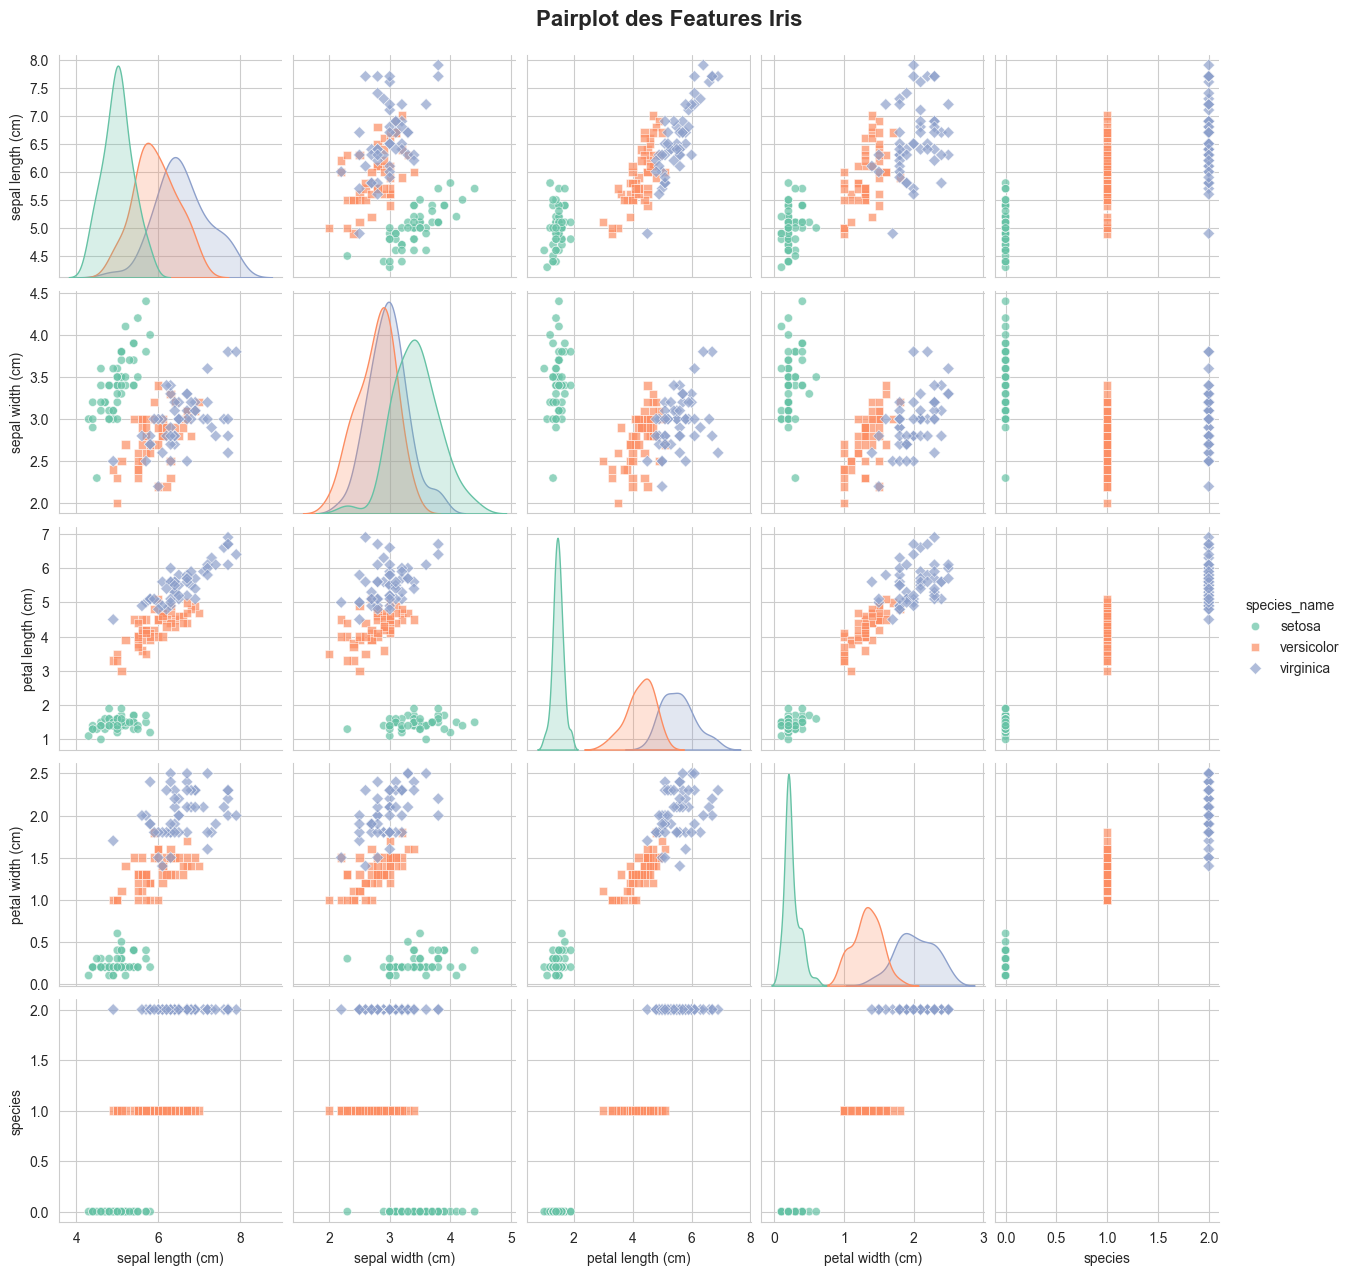

💡 Le pairplot révèle des séparations claires entre les espèces,
   notamment avec les dimensions des pétales.


In [17]:
# Pairplot pour visualiser les relations entre features
sns.pairplot(
    df,
    hue='species_name',
    palette='Set2',
    diag_kind='kde',
    markers=['o', 's', 'D'],
    plot_kws={'alpha': 0.7}
)
plt.suptitle('Pairplot des Features Iris', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("💡 Le pairplot révèle des séparations claires entre les espèces,")
print("   notamment avec les dimensions des pétales.")

### Matrice de Corrélation

In [ ]:
# Calcul de la corrélation
correlation_matrix = df[list(iris.feature_names)].corr()  # type: ignore

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    fmt='.2f'
)
plt.title('Matrice de Corrélation des Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 Observations :")
print("   - Forte corrélation entre petal length et petal width (0.96)")
print("   - Forte corrélation entre sepal length et petal length (0.87)")
print("   - Sepal width est moins corrélée avec les autres features")

## 4. Préparation des Données

In [ ]:
# Séparation features (X) et target (y)
X = iris.data  # type: ignore  # Features
y = iris.target  # type: ignore  # Labels

print(f"✓ X shape: {X.shape}")
print(f"✓ y shape: {y.shape}")

In [ ]:
# Split train/test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Préserve la distribution des classes
)

print("📊 Split des données :")
print(f"   - Training set : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"   - Test set     : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.0f}%)")

# Vérification de la distribution des classes
print("\n🎯 Distribution des classes dans le train set :")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"   - Classe {cls} ({iris.target_names[cls]}): {count} échantillons")  # type: ignore

### Standardisation des Features

Certains algorithmes (KNN, SVM) sont sensibles à l'échelle des features. On standardise les données pour avoir moyenne=0 et écart-type=1.

In [21]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit sur train uniquement
X_test_scaled = scaler.transform(X_test)  # Transform avec les stats du train

print("✓ Features standardisées")
print(f"\nMoyennes (train) : {X_train_scaled.mean(axis=0).round(2)}")
print(f"Écart-types (train) : {X_train_scaled.std(axis=0).round(2)}")

✓ Features standardisées

Moyennes (train) : [-0. -0.  0.  0.]
Écart-types (train) : [1. 1. 1. 1.]


## 5. Entraînement de Plusieurs Modèles

Nous allons entraîner et comparer 5 algorithmes différents :

In [22]:
# Dictionnaire de modèles à tester
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42)
}

print("🤖 Modèles à entraîner :")
for i, name in enumerate(models.keys(), 1):
    print(f"   {i}. {name}")

🤖 Modèles à entraîner :
   1. Logistic Regression
   2. K-Nearest Neighbors
   3. Decision Tree
   4. Random Forest
   5. Support Vector Machine


In [ ]:
# Entraînement et évaluation
results = {}

print("\n" + "="*60)
print("🚀 ENTRAÎNEMENT DES MODÈLES")
print("="*60 + "\n")

for name, model in models.items():
    print(f"⏳ Entraînement : {name}...")
    
    # Entraînement (sur données standardisées pour certains modèles)
    if name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Validation croisée sur le train set (5-fold)
    if name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Stockage des résultats
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"   ✓ Accuracy (test) : {accuracy:.4f}")
    print(f"   ✓ CV Score (mean) : {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print()

print("="*60)
print("✅ Tous les modèles ont été entraînés avec succès")
print("="*60)

## 6. Comparaison des Performances

In [ ]:
# Tableau comparatif
comparison_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Accuracy (Test)': [r['accuracy'] for r in results.values()],
    'CV Mean': [r['cv_mean'] for r in results.values()],
    'CV Std': [r['cv_std'] for r in results.values()]
}).sort_values('Accuracy (Test)', ascending=False)

print("\n📊 TABLEAU COMPARATIF DES PERFORMANCES")
print("="*60)
display(comparison_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy (Test)', 'CV Mean']))

In [ ]:
# Visualisation des performances
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
comparison_df.set_index('Modèle')['Accuracy (Test)'].plot(
    kind='barh',
    ax=ax[0],
    color=sns.color_palette('viridis', len(comparison_df)),
    edgecolor='black'
)
ax[0].set_xlabel('Accuracy', fontsize=12)
ax[0].set_title('Accuracy sur le Test Set', fontsize=14, fontweight='bold')
ax[0].set_xlim([0.9, 1.0])
ax[0].grid(axis='x', alpha=0.3)

# CV scores with error bars
x_pos = np.arange(len(comparison_df))
ax[1].barh(
    x_pos,
    comparison_df['CV Mean'],
    xerr=comparison_df['CV Std'],
    color=sns.color_palette('viridis', len(comparison_df)),
    edgecolor='black',
    capsize=5
)
ax[1].set_yticks(x_pos)
ax[1].set_yticklabels(comparison_df['Modèle'])
ax[1].set_xlabel('CV Score (mean ± std)', fontsize=12)
ax[1].set_title('Validation Croisée (5-Fold)', fontsize=14, fontweight='bold')
ax[1].set_xlim([0.9, 1.0])
ax[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Meilleur Modèle

In [ ]:
# Sélection du meilleur modèle
best_model_name = comparison_df.iloc[0]['Modèle']
best_model = results[best_model_name]['model']
best_accuracy = comparison_df.iloc[0]['Accuracy (Test)']

print(f"\n🏆 MEILLEUR MODÈLE : {best_model_name}")
print(f"   Accuracy : {best_accuracy:.4f}")
print(f"   CV Score : {results[best_model_name]['cv_mean']:.4f} (+/- {results[best_model_name]['cv_std']:.4f})")

## 7. Évaluation Détaillée du Meilleur Modèle

In [ ]:
# Classification report
print("\n📋 CLASSIFICATION REPORT")
print("="*60)
print(classification_report(
    y_test,
    results[best_model_name]['y_pred'],
    target_names=iris.target_names  # type: ignore
))

**Interprétation des métriques** :
- **Precision** : Parmi les prédictions positives, quelle proportion est correcte ?
- **Recall** : Parmi les vrais positifs, quelle proportion a été détectée ?
- **F1-score** : Moyenne harmonique de precision et recall
- **Support** : Nombre d'échantillons réels de chaque classe

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matrice de confusion (nombres)
disp1 = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names  # type: ignore
)
disp1.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Matrice de Confusion (Nombres)', fontsize=14, fontweight='bold')

# Matrice de confusion (proportions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp2 = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized,
    display_labels=iris.target_names  # type: ignore
)
disp2.plot(ax=ax[1], cmap='Blues', values_format='.2f')
ax[1].set_title('Matrice de Confusion (Proportions)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Interprétation :")
print("   - Diagonale : prédictions correctes")
print("   - Hors diagonale : erreurs de classification")

## 8. Prédiction sur de Nouvelles Données

In [ ]:
# Création de nouvelles données fictives
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Ressemble à setosa
    [6.5, 3.0, 5.2, 2.0],  # Ressemble à virginica
    [5.9, 3.0, 4.2, 1.5],  # Ressemble à versicolor
])

print("🔮 PRÉDICTION SUR DE NOUVELLES DONNÉES")
print("="*60)

# Standardisation si nécessaire
if best_model_name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
    new_samples_scaled = scaler.transform(new_samples)
    predictions = best_model.predict(new_samples_scaled)
    probas = best_model.predict_proba(new_samples_scaled)
else:
    predictions = best_model.predict(new_samples)
    probas = best_model.predict_proba(new_samples)

# Affichage des résultats
for i, (sample, pred, proba) in enumerate(zip(new_samples, predictions, probas), 1):
    print(f"\nÉchantillon {i} : {sample}")
    print(f"   Prédiction : {iris.target_names[pred]} (classe {pred})")  # type: ignore
    print(f"   Probabilités :")
    for j, species in enumerate(iris.target_names):  # type: ignore
        print(f"      - {species:12s} : {proba[j]:.4f} ({proba[j]*100:.1f}%)")

print("\n" + "="*60)

## 9. Visualisation des Frontières de Décision

Pour visualiser, on réduit à 2 dimensions (petal length et petal width, les plus discriminantes).

In [ ]:
# Sélection de 2 features pour visualisation
feature_indices = [2, 3]  # Petal length et petal width
X_2d = X[:, feature_indices]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement d'un modèle sur ces 2 features
model_2d = RandomForestClassifier(n_estimators=100, random_state=42)
model_2d.fit(X_train_2d, y_train_2d)

# Création du mesh pour les frontières de décision
h = 0.02  # Pas du mesh
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Prédictions sur le mesh
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisation
plt.figure(figsize=(12, 8))

# Frontières de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=2)

# Points du dataset
scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=y,
    cmap='viridis',
    edgecolors='black',
    s=100,
    alpha=0.8
)

# Configuration
plt.xlabel(iris.feature_names[feature_indices[0]], fontsize=12)  # type: ignore
plt.ylabel(iris.feature_names[feature_indices[1]], fontsize=12)  # type: ignore
plt.title('Frontières de Décision (Random Forest)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Espèce', ticks=[0, 1, 2])
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=iris.target_names,  # type: ignore
    loc='upper left'
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Les zones colorées représentent les régions de décision du modèle")

## 10. Sauvegarde du Modèle

In [ ]:
# Sauvegarde du meilleur modèle et du scaler
import os

# Créer le répertoire si nécessaire
os.makedirs('models', exist_ok=True)

# Sauvegarde
model_path = 'models/best_iris_classifier.pkl'
scaler_path = 'models/scaler.pkl'

joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)

print("💾 Modèle sauvegardé :")
print(f"   - Modèle : {model_path}")
print(f"   - Scaler : {scaler_path}")

In [ ]:
# Test de chargement
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Vérification
if best_model_name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
    test_pred = loaded_model.predict(loaded_scaler.transform(X_test))
else:
    test_pred = loaded_model.predict(X_test)

accuracy_loaded = accuracy_score(y_test, test_pred)

print("\n✅ Vérification du modèle chargé :")
print(f"   - Accuracy : {accuracy_loaded:.4f}")
print(f"   - Correspond au modèle original : {accuracy_loaded == best_accuracy}")

## 11. Résumé du Pipeline

In [ ]:
print("\n" + "="*60)
print("📝 RÉSUMÉ DU PIPELINE ML")
print("="*60)

summary = f"""
1. 📊 DONNÉES
   - Dataset : Iris (150 échantillons, 4 features, 3 classes)
   - Split : 80% train / 20% test
   - Classes équilibrées : 50 échantillons par classe

2. 🔍 EXPLORATION
   - Aucune valeur manquante
   - Features corrélées : petal length ↔ petal width (0.96)
   - Features discriminantes : dimensions des pétales

3. 🛠️ PRÉPARATION
   - Standardisation (mean=0, std=1)
   - Préservation de la distribution des classes (stratify)

4. 🤖 MODÉLISATION
   - 5 modèles testés
   - Validation croisée 5-fold
   - Meilleur modèle : {best_model_name}

5. 📈 PERFORMANCES
   - Accuracy (test) : {best_accuracy:.4f}
   - CV Score : {results[best_model_name]['cv_mean']:.4f} (+/- {results[best_model_name]['cv_std']:.4f})

6. 💾 DÉPLOIEMENT
   - Modèle sauvegardé : {model_path}
   - Prêt pour l'inférence
"""

print(summary)
print("="*60)
print("✅ Pipeline ML complet réalisé avec succès !")
print("="*60)

## Conclusion

### Points Clés

1. **Pipeline structuré** : Suivre un processus méthodique est essentiel
2. **EDA critique** : L'exploration révèle des insights importants sur les données
3. **Comparaison de modèles** : Tester plusieurs algorithmes aide à choisir le meilleur
4. **Validation croisée** : Évalue mieux la généralisation que le simple train/test split
5. **Sauvegarde** : Permet de réutiliser le modèle sans réentraînement

### Prochaines Étapes

- Optimisation des hyperparamètres (GridSearchCV, RandomizedSearchCV)
- Feature engineering avancé
- Essayer d'autres datasets plus complexes
- Déploiement en production (API REST avec Flask/FastAPI)

---

**Exercices** : Voir `00_exercices.ipynb` pour pratiquer ces concepts !